## Curate a mini version of PNW-ML dataset

In [13]:
import h5py
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import obspy

In [2]:
fcomcat = h5py.File("/data/whd01/yiyu_data/PNWML/comcat_waveforms.hdf5", 'r')
dfcomcat = pd.read_csv("/data/whd01/yiyu_data/PNWML/comcat_metadata.csv")

fexotic = h5py.File("/data/whd01/yiyu_data/PNWML/exotic_waveforms.hdf5", 'r')
dfexotic = pd.read_csv("/data/whd01/yiyu_data/PNWML/exotic_metadata.csv")

In [3]:
fminipnw = h5py.File("../data/microPNW/microPNW_waveforms.hdf5", 'w')
dfminipnw = pd.DataFrame()

In [4]:
Counter(dfexotic['source_type']), Counter(dfcomcat['source_type'])

(Counter({'thunder': 146,
          'sonic boom': 206,
          'plane crash': 3,
          'surface event': 8912}),
 Counter({'earthquake': 167966, 'explosion': 15943}))

In [5]:
eq = dfcomcat[((dfcomcat['station_channel_code'] == "BH")|(dfcomcat['station_channel_code'] == "HH"))&(dfcomcat['source_type'] == "earthquake")].index
ieq = np.random.choice(eq, 10, replace = False)

ex = dfcomcat[((dfcomcat['station_channel_code'] == "BH")|(dfcomcat['station_channel_code'] == "HH"))&(dfcomcat['source_type'] == "explosion")].index
iex = np.random.choice(ex, 10, replace = False)

sn = dfexotic[((dfexotic['station_channel_code'] == "BH")|(dfexotic['station_channel_code'] == "HH"))&(dfexotic['source_type'] == "sonic boom")].index
isn = np.random.choice(sn, 10, replace = False)

th = dfexotic[((dfexotic['station_channel_code'] == "BH")|(dfexotic['station_channel_code'] == "HH"))&(dfexotic['source_type'] == "thunder")].index
ith = np.random.choice(th, 10, replace = False)

su = dfexotic[((dfexotic['station_channel_code'] == "BH")|(dfexotic['station_channel_code'] == "HH"))&(dfexotic['source_type'] == "surface event")].index
isu = np.random.choice(su, 10, replace = False)

In [6]:
for ie, ievent_type in enumerate([ieq, iex, isn, ith, isu]):
    print(len(ievent_type))

10
10
10
10
10


In [7]:
for ie, ievent_type in enumerate([ieq, iex, isn, ith, isu]):
    if ie <= 1:
        tmp_data = np.zeros(shape = [len(ievent_type), 3, 15001])
    else:
        tmp_data = np.zeros(shape = [len(ievent_type), 3, 18001])
    tmp_df = pd.DataFrame()
    new_bucket = ie + 1
    for idx, iieq in enumerate(ievent_type):
        if ie <= 1:
            i = dfcomcat.iloc[iieq]  
            bucket, array = i['trace_name'].split('$')
            x, y, z = iter([int(i) for i in array.split(',:')])
            tmp_data[idx, :, :] = fcomcat[f'/data/{bucket}'][x, :y, :z]
            new_array = ",:".join([str(idx), str(y), str(z)])
            new_trace_name = f"bucket{new_bucket}${new_array}"
            i['trace_name'] = new_trace_name
            tmp_df = tmp_df.append(i)
        else:
            i = dfexotic.iloc[iieq]  
            bucket, array = i['trace_name'].split('$')
            x, y, z = iter([int(i) for i in array.split(',:')])
            tmp_data[idx, :, :] = fexotic[f'/data/{bucket}'][x, :y, :z]
            new_array = ",:".join([str(idx), str(y), str(z)])
            new_trace_name = f"bucket{new_bucket}${new_array}"
            i['trace_name'] = new_trace_name
            tmp_df = tmp_df.append(i)
    fminipnw[f'/data/bucket{new_bucket}'] = tmp_data.astype('float32')
    dfminipnw = dfminipnw.append(tmp_df)

/tmp/ipykernel_2241480/1849536112.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['trace_name'] = new_trace_name
/tmp/ipykernel_2241480/1849536112.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append(i)
/tmp/ipykernel_2241480/1849536112.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['trace_name'] = new_trace_name
/tmp/ipykernel_2241480/1849536112.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df =

/tmp/ipykernel_2241480/1849536112.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append(i)
/tmp/ipykernel_2241480/1849536112.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['trace_name'] = new_trace_name
/tmp/ipykernel_2241480/1849536112.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append(i)
/tmp/ipykernel_2241480/1849536112.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['trace_name']

/tmp/ipykernel_2241480/1849536112.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['trace_name'] = new_trace_name
/tmp/ipykernel_2241480/1849536112.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df = tmp_df.append(i)
/tmp/ipykernel_2241480/1849536112.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['trace_name'] = new_trace_name
/tmp/ipykernel_2241480/1849536112.py:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  tmp_df =

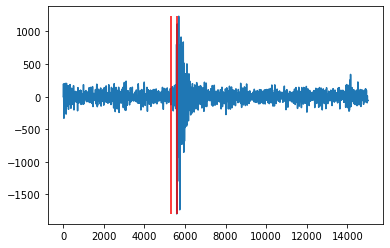

In [28]:
index = 4
d = fminipnw[f'/data/bucket1'][index, :, :]

s = obspy.Trace()
s.data = d[0, :]
s.stats.delta = 1/100
s.filter('bandpass', freqmax = 10, freqmin = 1)
ss = dfminipnw.iloc[index, 21]
ps = dfminipnw.iloc[index, 22]

plt.plot(s.data)
plt.vlines(ss, np.max(s.data), np.min(s.data), 'r')
plt.vlines(ps, np.max(s.data), np.min(s.data), 'r')

In [29]:
dfminipnw.drop(columns=['trace_missing_channel', 'trace_has_offset'], inplace = True)

In [30]:
dfminipnw.loc[dfminipnw[dfminipnw['source_type'] == "surface event"]['source_type_pnsn_label'].index, 'source_type_pnsn_label'] = 'su'
dfminipnw.loc[dfminipnw[dfminipnw['source_type'] == "thunder"]['source_type_pnsn_label'].index, 'source_type_pnsn_label'] = 'th'
dfminipnw.loc[dfminipnw[dfminipnw['source_type'] == "sonic boom"]['source_type_pnsn_label'].index, 'source_type_pnsn_label'] = 'sn'

In [31]:
pd.set_option('display.max_columns', None)
dfminipnw

,event_id,source_origin_time,source_latitude_deg,source_longitude_deg,source_type,source_depth_km,preferred_source_magnitude,preferred_source_magnitude_type,preferred_source_magnitude_uncertainty,source_depth_uncertainty_km,source_horizontal_uncertainty_km,station_network_code,station_channel_code,station_code,station_location_code,station_latitude_deg,station_longitude_deg,station_elevation_m,trace_name,trace_sampling_rate_hz,trace_start_time,trace_S_arrival_sample,trace_P_arrival_sample,trace_S_arrival_uncertainty_s,trace_P_arrival_uncertainty_s,trace_P_polarity,trace_S_onset,trace_P_onset,trace_snr_db,source_type_pnsn_label,source_local_magnitude,source_local_magnitude_uncertainty,source_duration_magnitude,source_duration_magnitude_uncertainty,source_hand_magnitude
181186,uw61896586,2022-11-29T18:32:00.320000Z,48.507,-123.607,earthquake,22.160,1.66,ml,0.213,1.05,0.430,CN,HH,VGZ,--,48.4130,-123.325,67.0,"bucket1$0,:3,:15001",100,2022-11-29T18:31:10.320000Z,5857.0,5491.0,0.15,0.06,negative,emergent,impulsive,10.102|19.541|9.825,eq,1.66,0.213,1.11,0.238,NaN
139188,uw61554931,2019-10-12T07:26:35.460000Z,46.714,-122.308,earthquake,15.090,0.95,ml,0.147,2.01,0.390,CC,BH,OBSR,--,46.9000,-121.815,2382.0,"bucket1$1,:3,:15001",100,2019-10-12T07:25:45.460000Z,6313.0,5735.0,0.06,0.06,positive,impulsive,impulsive,15.781|5.721|6.151,eq,0.95,0.147,0.87,0.240,NaN
143587,uw61685091,2020-09-19T18:10:27.260000Z,46.352,-122.307,earthquake,17.000,1.46,ml,0.140,0.46,0.260,UO,HH,RAIN,--,46.0830,-123.011,236.5,"bucket1$2,:3,:15001",100,2020-09-19T18:09:37.260000Z,6858.0,6050.0,0.15,0.06,negative,emergent,impulsive,12.578|8.786|16.109,eq,1.46,0.140,1.18,0.243,NaN
168867,uw61785662,2021-11-02T04:48:43.370000Z,46.715,-119.185,earthquake,19.490,1.45,ml,0.274,0.56,0.330,UW,HH,LIGO,--,46.4620,-119.418,157.0,"bucket1$3,:3,:15001",100,2021-11-02T04:47:53.370000Z,6224.0,5700.0,0.15,0.15,undecidable,emergent,emergent,6.069|8.323|3.499,eq,1.45,0.274,1.42,0.332,NaN
96996,uw60970767,2015-03-10T15:55:38.050000Z,46.766,-121.953,earthquake,2.914,0.48,ml,0.182,2.30,0.890,CC,BH,OBSR,--,46.9000,-121.815,2382.0,"bucket1$4,:3,:15001",100,2015-03-10T15:54:48.050000Z,5583.0,5321.0,0.06,0.03,positive,impulsive,impulsive,4.368|1.387|13.184,eq,0.48,0.182,0.41,0.221,NaN
127499,uw61502251,2018-11-03T00:32:40.550000Z,47.202,-119.480,earthquake,19.100,2.06,ml,0.143,0.62,0.400,UW,HH,EPH2,--,47.3710,-119.612,690.0,"bucket1$5,:3,:15001",100,2018-11-03T00:31:50.550000Z,5831.0,5469.0,0.06,0.03,negative,impulsive,impulsive,30.329|28.136|30.066,eq,2.06,0.143,2.45,0.323,NaN
50615,uw60432237,2012-07-29T11:34:07.880000Z,42.244,-124.659,earthquake,-0.878,1.60,ml,0.114,2.29,4.130,TA,BH,K02D,--,42.6960,-123.665,989.0,"bucket1$6,:3,:15001",100,2012-07-29T11:33:17.880000Z,7979.0,6677.0,0.15,0.15,undecidable,emergent,emergent,-0.555|-0.813|-0.888,eq,1.60,0.114,1.60,0.093,NaN
35114,uw10788718,2010-02-17T15:07:35.540000Z,46.337,-122.228,earthquake,7.675,0.91,ml,0.100,0.86,0.542,CC,BH,STD,--,46.2370,-122.224,1189.0,"bucket1$7,:3,:15001",100,2010-02-17T15:06:45.540000Z,5474.0,5270.0,0.04,0.04,undecidable,NaN,NaN,11.086|12.311|10.81,eq,0.91,0.100,0.40,0.020,NaN
153863,uw61673761,2020-08-24T06:35:00.830000Z,47.699,-120.123,earthquake,2.910,0.82,ml,0.153,1.64,0.250,UW,HH,CBS,--,47.8050,-120.043,1067.0,"bucket1$8,:3,:15001",100,2020-08-24T06:34:10.830000Z,5410.0,5226.0,0.03,0.03,positive,impulsive,impulsive,24.533|21.951|21.968,eq,0.82,0.153,0.69,0.378,NaN
63450,uw60564102,2013-08-04T22:41:29.800000Z,47.348,-122.056,earthquake,18.842,1.24,ml,0.126,1.14,0.410,CC,BH,OBSR,--,46.9000,-121.815,2382.0,"bucket1$9,:3,:15001",100,2013-08-04T22:40:39.800000Z,6612.0,5914.0,0.06,0.03,positive,impulsive,impulsive,8.582|3.984|7.487,eq,1.24,0.126,1.05,0.154,NaN


In [32]:
dfminipnw.reset_index(drop = True, inplace = True)

In [33]:
dfminipnw.loc[dfminipnw[dfminipnw['source_type'] == 'sonic boom'].index, 'source_type'] = 'sonic_boom'
dfminipnw.loc[dfminipnw[dfminipnw['source_type'] == 'surface event'].index, 'source_type'] = 'surface_event'

In [34]:
dfminipnw.to_csv("../data/microPNW/microPNW_metadata.csv", index = False, float_format = '%.3f')